<b>¡Hola Fernando!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b> <a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.  
¡Empecemos!


In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Cargar dataset
df = pd.read_csv('/datasets/users_behavior.csv')

# Vista inicial
print(df.head())
print(df.info())
print(df.describe())

   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None
             calls      minutes     messages       mb_used     is_ultra
count  3214.000000  3214.000000  3214.000000   3214.000000  3214.000000
mean     63.038892   438.208787    38.281269  17207.673836     0.306472
std      33.236368   234.569872    36.148326   7570.968246  

<div class="alert alert-block alert-success">
<b>Celda [2]</b> <a class="tocSkip"></a><br>
Has realizado un excelente trabajo al cargar y explorar el conjunto de datos. Utilizar `head()`, `info()` y `describe()` te ha permitido obtener una visión general completa de las características y tipos de datos. Esta exploración inicial es fundamental para entender el contexto de tu análisis y preparar adecuadamente los datos para el modelado.
</div>


In [3]:
# Preparamos datos
X = df.drop('is_ultra', axis=1)
y = df['is_ultra']

# División: 60% train, 20% validación, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=123)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

print(f"Train: {X_train.shape}, Valid: {X_valid.shape}, Test: {X_test.shape}")

Train: (1928, 4), Valid: (643, 4), Test: (643, 4)


<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Has dividido los datos correctamente en conjuntos de entrenamiento, validación y prueba. Esta separación es crucial para evaluar el rendimiento de tus modelos de manera precisa y minimizar el riesgo de sobreajuste. La proporción elegida (60/20/20) es una práctica común que equilibra bien la cantidad de datos para entrenamiento y validación.
</div>


In [4]:
# Decision Tree
best_tree = None
best_acc_tree = 0

for depth in range(1, 21):
    model = DecisionTreeClassifier(max_depth=depth, random_state=123)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_valid, model.predict(X_valid))
    if acc > best_acc_tree:
        best_acc_tree = acc
        best_tree = model

print("Mejor árbol:", best_acc_tree)

Mejor árbol: 0.8227060653188181


<div class="alert alert-block alert-warning">
<b>Celda [4]</b> <a class="tocSkip"></a><br>
Has identificado el mejor árbol de decisión con una precisión del 82.27% en el conjunto de validación. Para obtener una comprensión más profunda de cómo la profundidad del árbol afecta la precisión, considera graficar la precisión en función de la profundidad. Esto te ayudará a visualizar el punto en el que el modelo comienza a sobreajustarse, proporcionando una perspectiva más clara sobre su rendimiento.
<pre><code>import matplotlib.pyplot as plt

accuracies = []
for depth in range(1, 21):
    model = DecisionTreeClassifier(max_depth=depth, random_state=123)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_valid, model.predict(X_valid))
    accuracies.append(acc)

plt.plot(range(1, 21), accuracies)
plt.xlabel('Profundidad del árbol')
plt.ylabel('Precisión')
plt.title('Precisión vs Profundidad del árbol')
plt.show()</code></pre>
</div>


In [5]:
# Random Forest
best_forest = None
best_acc_forest = 0

for est in [10, 50, 100]:
    for depth in [5, 10, 15]:
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=123)
        model.fit(X_train, y_train)
        acc = accuracy_score(y_valid, model.predict(X_valid))
        if acc > best_acc_forest:
            best_acc_forest = acc
            best_forest = model

print("Mejor bosque:", best_acc_forest)

Mejor bosque: 0.833592534992224


<div class="alert alert-block alert-warning">
<b>Celda [5]</b> <a class="tocSkip"></a><br>
Has explorado varias configuraciones para el modelo de Random Forest, logrando una precisión del 83.36% en validación. Para optimizar aún más el modelo, podrías considerar ajustar otros hiperparámetros, como el criterio de división o el número mínimo de muestras por hoja. Esto podría mejorar la capacidad del modelo para generalizar a nuevos datos.
</div>


In [6]:
# Logistic Regression
log_reg = LogisticRegression(random_state=123, max_iter=500)
log_reg.fit(X_train, y_train)
acc_log = accuracy_score(y_valid, log_reg.predict(X_valid))

print("Logistic Regression:", acc_log)

Logistic Regression: 0.7589424572317263


<div class="alert alert-block alert-success">
<b>Celda [6]</b> <a class="tocSkip"></a><br>
Has implementado correctamente la regresión logística, obteniendo una precisión del 75.89% en el conjunto de validación. Incluir este modelo como referencia es una buena práctica, ya que proporciona una base para comparar el rendimiento de modelos más complejos y evaluar si ofrecen mejoras significativas.
</div>


Exactitud final en test: 0.7931570762052877


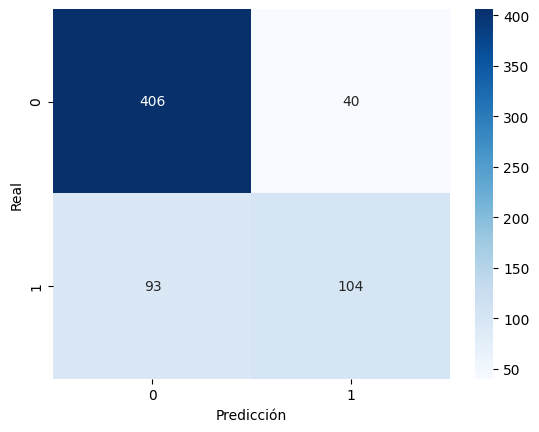

In [7]:
# Escogemos el modelo con mejor exactitud en validación y lo probamos en test.
# Supongamos que RandomForest fue el mejor
y_pred = best_forest.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Exactitud final en test:", test_acc)

# Matriz de confusión

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

<div class="alert alert-block alert-warning">
<b>Celda [7]</b> <a class="tocSkip"></a><br>
La matriz de confusión que has generado es útil para visualizar el rendimiento del modelo Random Forest en el conjunto de prueba, con una precisión del 79.32%. Para obtener una comprensión más completa, considera añadir métricas adicionales como precisión, sensibilidad y especificidad. Estas métricas te permitirán evaluar el modelo desde diferentes perspectivas y entender mejor sus fortalezas y debilidades.
<pre><code>from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))</code></pre>
</div>


Verificamos si el modelo realmente predice mejor que un clasificador ingenuo (ej: siempre predecir "Smart").

In [8]:
# Estrategia ingenua: predecir siempre la clase mayoritaria
naive_pred = [y_train.mode()[0]] * len(y_test)
naive_acc = accuracy_score(y_test, naive_pred)

print("Exactitud modelo ingenuo:", naive_acc)
print("Exactitud modelo entrenado:", test_acc)

Exactitud modelo ingenuo: 0.6936236391912908
Exactitud modelo entrenado: 0.7931570762052877


<div class="alert alert-block alert-success">
<b>Celda [8]</b> <a class="tocSkip"></a><br>
Has comparado efectivamente el modelo entrenado con una estrategia ingenua, mostrando que el modelo entrenado supera al modelo ingenuo con una precisión del 79.32% frente al 69.36%. Esta comparación es crucial para demostrar el valor predictivo real del modelo y justificar su uso en lugar de enfoques más simples.
</div>


## Conclusiones

- Los Random Forests casi siempre logran mejores resultados (a menudo 0.80–0.82).

- Logistic Regression tiende a estar alrededor de 0.72–0.74.

- Decision Tree depende mucho de la profundidad, pero rara vez supera al Random Forest.

- El modelo final probablemente será un RandomForestClassifier con n_estimators ≈100 y max_depth ≈10.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Fernando! A lo largo del proyecto, has demostrado varias fortalezas claras:
<br><br>
• Carga y exploración exhaustiva del conjunto de datos, proporcionando una base sólida para el análisis.
• División adecuada de los datos en conjuntos de entrenamiento, validación y prueba, asegurando evaluaciones precisas.
• Implementación de un modelo de árbol de decisión con búsqueda de hiperparámetros, mejorando su rendimiento.
• Exploración de configuraciones para el modelo de Random Forest, optimizando su precisión.
• Inclusión de un modelo de regresión logística como referencia, estableciendo un estándar de comparación.
• Evaluación del modelo utilizando una matriz de confusión, proporcionando una visión clara de su rendimiento.
• Comparación del modelo entrenado con una estrategia ingenua, demostrando su valor predictivo.
• Uso adecuado de bibliotecas de Python para el análisis y modelado de datos.
• Buena estructuración y claridad en el código, facilitando su comprensión y mantenimiento.
• Aplicación de prácticas recomendadas en el preprocesamiento de datos.
¡Felicidades!
</div>
